# Project: Investigate The Movie Database (TMDb) Dataset.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **About**: The Movie Database (TMDb) is a popular, user editable database for movies and TV shows. The project was founded in 2008 by Travis Bell to collect film posters. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. The data set contains 10866 rows and 21 columns.

### Properties
<ul>
<li>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.</li>
<li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.</li>
</ul>

#### For the analysis of this dataset, the following questions are explored:
> **1.** Is the popularity of a movie dependent on the budget of the production?<br/>
> **2.** Does a high budget movie guarantees an equally higher revenue?<br/>
> **3.** Does the release year of a movie affects its revenue?


In [1]:
# Import statements for all of the packages.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> This step highlights the properties of the data, while detailing observations.

### General Properties

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# Check data shape to ascertain the number of rows and columns
df.shape

(10866, 21)

In [4]:
# Check for datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
# Check descriptive statistics for the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
# Confirm that there are zero values
0 in df.values

True

There appears to be zero values in some of the columns according to the data description. We explore some of the columns with zero values

In [7]:
# Count of zero values in the budget column
df.query('budget == 0').count()

id                      5696
imdb_id                 5687
popularity              5696
budget                  5696
revenue                 5696
original_title          5696
cast                    5631
homepage                1229
director                5656
tagline                 3488
keywords                4534
overview                5692
runtime                 5696
genres                  5674
production_companies    4802
release_date            5696
vote_count              5696
vote_average            5696
release_year            5696
budget_adj              5696
revenue_adj             5696
dtype: int64

In [8]:
# Count of zero values in the revenue column
df.query('revenue == 0').count()

id                      6016
imdb_id                 6006
popularity              6016
budget                  6016
revenue                 6016
original_title          6016
cast                    5945
homepage                1271
director                5973
tagline                 3656
keywords                4758
overview                6012
runtime                 6016
genres                  5993
production_companies    5082
release_date            6016
vote_count              6016
vote_average            6016
release_year            6016
budget_adj              6016
revenue_adj             6016
dtype: int64

In [9]:
# Count of zero values in the runtime column
df.query('runtime == 0').count()

id                      31
imdb_id                 31
popularity              31
budget                  31
revenue                 31
original_title          31
cast                    31
homepage                 6
director                29
tagline                  5
keywords                15
overview                29
runtime                 31
genres                  30
production_companies    13
release_date            31
vote_count              31
vote_average            31
release_year            31
budget_adj              31
revenue_adj             31
dtype: int64

 There is large number of zero values in the budget and revenue columns, and 31 zero values in the runtime column. It is also important at this stage to know if there are null values in our data.

In [10]:
# Check for missing data
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
# Check for duplicate rows
sum(df.duplicated())

1

## Data Cleaning

> The descriptive statistics showed that some of the columns have zero values, and further exploration of this revealed that the budget, revenue, runtime, budget_adj, and revenue_adj are the columns with zero values. Some of the columns also have null values, and the dataset has a duplicated row.

#### Data Structure

> The count of zero values in the budget and revenue columns is very large, a quick google search for some of these movies actually listed their budgets. However, since they are not included in the dataset, we will have account for these values based on the data we were provided. The choices are to either drop these missing values or do a data imputation to replace them. The percent of zero values in the budget and revenue columns is over 50%. Replacing these values with the mean will reduce the variance of the dataset, and might cause a bias in the analysis. To keep the integrity of the data, I decided to replace the zero values with NaN. 

#### Deleting columns and duplicate rows

> Irrelevant columns and duplicate rows will be dropped.

In [12]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [13]:
# Confirm duplicate rows are dropped
sum(df.duplicated())

0

In [14]:
# Drop irrelevant columns

irr_col = ['imdb_id', 'homepage', 'tagline', 'overview', 'budget_adj', 'revenue_adj', 'production_companies']
df.drop(irr_col, axis=1, inplace=True)

In [15]:
# Confirm columns are dropped

df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [16]:
# Replace zero values with the Nan
df=df.mask(df==0).fillna(np.nan)

In [17]:
# Confirm that zero values have been replaced
0 in df.values

False

In [18]:
# Check for null values
df.isnull().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
keywords          1493
runtime             31
genres              23
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [19]:
# Drop rows with null values in the genre columns
col_na = ['cast', 'director', 'genres']
df.dropna(axis=0, how='any', subset= col_na, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
id                10731 non-null int64
popularity        10731 non-null float64
budget            5153 non-null float64
revenue           4843 non-null float64
original_title    10731 non-null object
cast              10731 non-null object
director          10731 non-null object
keywords          9306 non-null object
runtime           10703 non-null float64
genres            10731 non-null object
release_date      10731 non-null object
vote_count        10731 non-null int64
vote_average      10731 non-null float64
release_year      10731 non-null int64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.2+ MB


In [21]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10703.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.736896,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.079331,578.815324,0.930283,12.820151
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis
> This part of the analysis will provide a visual representation of the analysis

### Does the popularity of a movies depend on the budget of production?

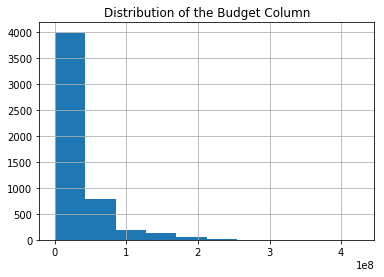

In [22]:
# Check the distribution of the budget column
df['budget'].hist()
plt.title('Distribution of the Budget Column');

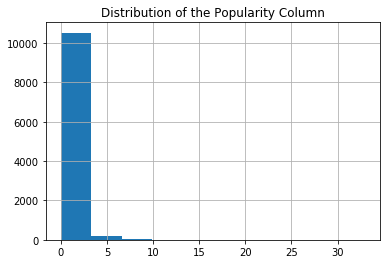

In [23]:
# Check the distribution of the popularity column
df['popularity'].hist()
plt.title('Distribution of the Popularity Column');

In [24]:
#Check descriptive statistics of dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10703.000000,10731.000000,10731.000000,10731.000000
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.736896,219.812972,5.964710,2001.259622
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.079331,578.815324,0.930283,12.820151
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


> The distribution of the budget and popularity columns appears to be skewed to the right. The description of the data further confirms this as the means of both columns are greater then their respective median value.

In [25]:
# Use query to select each group and get its mean popularity
median = df['budget'].median()
low_budget = df.query('budget < {}'.format(median))
high_budget = df.query('budget >= {}'.format(median))

mean_low_popularity = low_budget['popularity'].mean()
mean_high_popularity = high_budget['popularity'].mean()

In [26]:
print(mean_low_popularity, mean_high_popularity)

0.6140166850485451 1.375382975174554


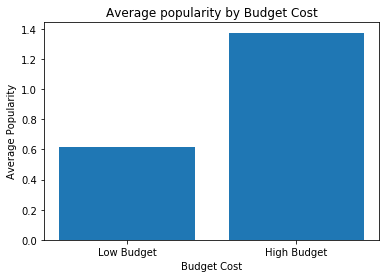

In [27]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_low_popularity, mean_high_popularity]
labels = ['Low Budget', 'High Budget']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average popularity by Budget Cost')
plt.xlabel('Budget Cost')
plt.ylabel('Average Popularity');

> The above lines of code analyzes the budget and the popularity column and answers the question if the popularity of a movie is dependednt on the budget of the movie. The bar chart above proves that the popularity of a movie is indeed dependent on how much goes into the overall budget of the movie.

### Is the revenue generated by the movies dependent on the budget of production?

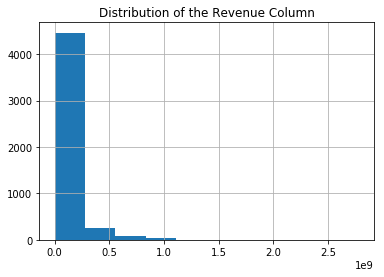

In [28]:
# View the distribution of the revenue column
df['revenue'].hist()
plt.title('Distribution of the Revenue Column');

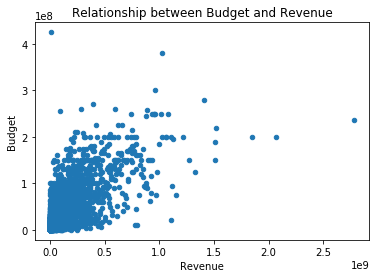

In [29]:
# Use scatter plot to analyze the relationship between the budget column and revenue column
df.plot(x = 'revenue', y = 'budget', kind='scatter')
plt.title('Relationship between Budget and Revenue')
plt.xlabel('Revenue')
plt.ylabel('Budget');

> The scatter plot shows that there is a positive linear correlation between the budget and the revenue. This means that the profit realized from a movie is dependent on the budget cost. 

### Does the release year of a movie affects its revenue?

> For this analysis, I decided to creat a new column `profit`. 


In [30]:
# Create a new column to hold the difference of the revenue and budget columns
df['profit'] = df['revenue'] - df['budget']

In [31]:
# View the first 5 rows
df['profit'].head(5)

0    1.363529e+09
1    2.284364e+08
2    1.852382e+08
3    1.868178e+09
4    1.316249e+09
Name: profit, dtype: float64

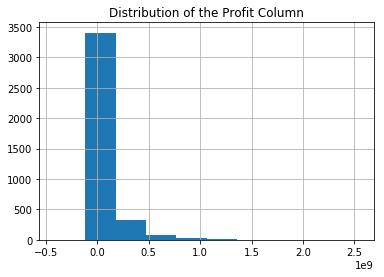

In [32]:
# View the distribution of the profit column
df['profit'].hist()
plt.title('Distribution of the Profit Column');

In [33]:
# View properties of the profit column
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,10731.000000,10731.000000,5.153000e+03,4.843000e+03,10703.000000,10731.000000,10731.000000,10731.000000,3.849000e+03
mean,65201.741869,0.652615,3.082824e+07,8.933981e+07,102.736896,219.812972,5.964710,2001.259622,7.056595e+07
std,91470.508056,1.004804,3.893199e+07,1.621546e+08,30.079331,578.815324,0.930283,12.820151,1.506990e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,-4.139124e+08
25%,10547.500000,0.210765,6.000000e+06,7.779664e+06,90.000000,17.000000,5.400000,1995.000000,-1.312284e+06
50%,20323.000000,0.387081,1.750000e+07,3.191160e+07,99.000000,39.000000,6.000000,2006.000000,2.014450e+07
75%,73948.500000,0.720889,4.000000e+07,1.000000e+08,112.000000,148.000000,6.600000,2011.000000,8.198066e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,2.544506e+09


In [34]:
# Analyze the profit by year
yearly_profit = df.groupby('release_year')['profit'].sum()

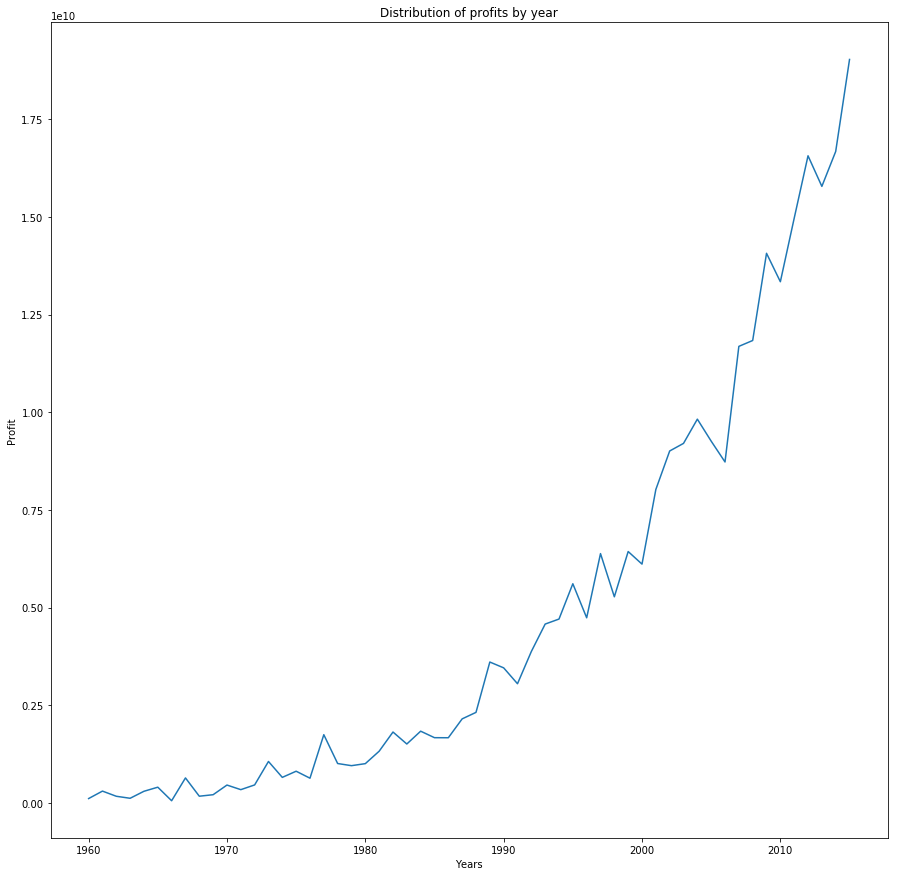

In [35]:
# Figure size
plt.figure(figsize=(15, 15))

# Label x axis
plt.xlabel('Years')

# Label yaxis
plt.ylabel('Profit')

# Label the chart
plt.title('Distribution of profits by year')

# Plot the data
plt.plot(yearly_profit);

> The line graph shows the progression of the profits over the years. The year with the most profits is 2015.

<a id='conclusions'></a>
## Conclusions

> This analysis explores the movie database data set. We can conclude that the success of a movie in terms of revenue, and popularity depends on the budget of the movie. The budget of a movies plays a significant role throughout the film’s life cycle with implications going far beyond the mere cost of the film. A movie budget includes costs of acquiring the script, payments to talent, production costs, and the promotion of the movie. It is safe to say the investment in making a movie determines how well the movies does, in terms of profit. The limitations of the analysis is the large number of zero values in the budget and the revenue data.

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0